<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/YB2%EC%A1%B0_%EC%A3%BC%EC%8B%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U finance-datareader

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=002d43bc6eaaa63afc82eb2a47a470bdac41830a268630bbc4f59857b20ca541
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# X 지표 선정과정

https://github.com/ujeongmin/ESAA/blob/main/%EC%A3%BC%EC%8B%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_X%EC%84%A0%ED%83%9D.ipynb


> 해당 주소에 코드 있습니다

## 최종 X 16가지 (y는 Change) 로 1년치 데이터 불러오기

EMA_5, PVO, EOM or EMV, VPT, CMF, SR, Exchange Rate, DPO, MFI, KOSDAQ, RSI, WR, CCI, UO, FI, +-VI

In [ ]:
import FinanceDataReader as fdr

# 원하는 기간 설정
start_date = '20230102'
end_date = '20240114'


# 코스피 지수
ksp = fdr.DataReader('KS11', start_date, end_date)
ksp.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2023-01-02,2249.95,2259.88,2222.37,2225.67,346344799,-0.0048,2,-10.73,5200137586818,1759241799519040
2023-01-03,2230.98,2230.98,2180.67,2218.68,410245325,-0.0031,2,-6.99,6149082624890,1753771077018843
2023-01-04,2205.98,2260.06,2198.82,2255.98,412841149,0.0168,1,37.30,6487597995523,1783808765569816
2023-01-05,2268.20,2281.39,2252.97,2264.65,430977022,0.0038,1,8.67,7521178466245,1791816776272757
2023-01-06,2253.40,2300.62,2253.27,2289.97,398606581,0.0112,1,25.32,6764112169245,1811418923114710


In [ ]:
ksp.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2024-01-08,2584.23,2591.68,2566.34,2567.82,320143990,-0.0040,2,-10.26,6763632029996,2067290656237408
2024-01-09,2598.31,2599.37,2556.00,2561.24,791214273,-0.0026,2,-6.58,8896714487368,2061575745648289
2024-01-10,2563.97,2568.19,2539.82,2541.98,570021066,-0.0075,2,-19.26,8795834820834,2045533566125824
2024-01-11,2543.03,2557.30,2540.27,2540.27,788422596,-0.0007,2,-1.71,13669889824902,2043896294511727
2024-01-12,2536.55,2543.83,2517.76,2525.05,790177187,-0.0060,2,-15.22,8368765827550,2047248114238733


In [ ]:
ksp.shape

(254, 10)

In [ ]:
import ta

# 16가지 피처 추가

H, L, C, V = ksp['High'], ksp['Low'], ksp['Close'], ksp['Volume']

# 원/달러 환율
exc = fdr.DataReader('USD/KRW', start_date, end_date)
ksp['Exchange Rate'] = exc['Close']

# 코스닥 지수
kos = fdr.DataReader('KQ11', start_date, end_date)
ksp['KOSDAQ'] = kos['Close']

# Volume 관련 지표
ksp['MFI'] = ta.volume.money_flow_index(high=H, low=L, close=C, volume=V, fillna=True)
ksp['CMF'] = ta.volume.chaikin_money_flow(high=H, low=L, close=C, volume=V, fillna=True)
ksp['EOM, EMV'] = ta.volume.ease_of_movement(high=H, low=L, volume=V, fillna=True)
ksp['VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
ksp['FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)

# 추세 관련 지표
ksp['EMA_5'] = ta.trend.ema_indicator(close=C, window=5, fillna=True)
ksp['DPO'] = ta.trend.dpo(close=C, fillna=True)
ksp['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)
ksp['-VI'] = ta.trend.vortex_indicator_neg(high=H, low=L, close=C, fillna=True)
ksp['+VI'] = ta.trend.vortex_indicator_pos(high=H, low=L, close=C, fillna=True)

# 모멘텀 관련 지표
ksp['RSI'] = ta.momentum.rsi(close=C, fillna=True)
ksp['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
ksp['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
ksp['PVO'] = ta.momentum.pvo(volume=V, fillna=True)
ksp['UO'] = ta.momentum.ultimate_oscillator(high=H, low=L, close=C, fillna=True)

In [ ]:
ksp.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,...,EMA_5,DPO,CCI,-VI,+VI,RSI,SR,WR,PVO,UO
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,2249.95,2259.88,2222.37,2225.67,346344799,-0.0048,2,-10.73,5200137586818,1759241799519040,...,2225.670000,275.892480,0.000000,0.000000,0.000000,100.000000,8.797654,-91.202346,0.000000,0.000000
2023-01-03,2230.98,2230.98,2180.67,2218.68,410245325,-0.0031,2,-6.99,6149082624890,1753771077018843,...,2223.340000,279.387480,-66.666667,0.240393,0.026130,0.000000,47.986365,-52.013635,1.451950,43.281713
2023-01-04,2205.98,2260.06,2198.82,2255.98,412841149,0.0168,1,37.30,6487597995523,1783808765569816,...,2234.220000,268.119147,56.421170,0.285021,0.225212,85.177875,94.860814,-5.139186,2.598096,63.846773
2023-01-05,2268.20,2281.39,2252.97,2264.65,430977022,0.0038,1,8.67,7521178466245,1791816776272757,...,2244.363333,260.317480,130.554607,0.282611,0.406931,87.782791,83.379666,-16.620334,3.827831,60.203967
2023-01-06,2253.40,2300.62,2253.27,2289.97,398606581,0.0112,1,25.32,6764112169245,1811418923114710,...,2259.565556,250.572480,106.056737,0.314204,0.467769,92.131785,91.121301,-8.878699,4.033360,63.848241


In [ ]:
# NaN값 이전 값으로 대체
ksp = ksp.fillna(method='ffill')

In [ ]:
ksp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2023-01-02 to 2024-01-12
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           254 non-null    float64
 1   High           254 non-null    float64
 2   Low            254 non-null    float64
 3   Close          254 non-null    float64
 4   Volume         254 non-null    int64  
 5   Change         254 non-null    float64
 6   UpDown         254 non-null    int64  
 7   Comp           254 non-null    float64
 8   Amount         254 non-null    int64  
 9   MarCap         254 non-null    int64  
 10  Exchange Rate  254 non-null    float64
 11  KOSDAQ         254 non-null    float64
 12  MFI            254 non-null    float64
 13  CMF            254 non-null    float64
 14  EOM, EMV       254 non-null    float64
 15  VPT            254 non-null    float64
 16  FI             254 non-null    float64
 17  EMA_5          254 non-null    floa

In [ ]:
ksp.shape

(254, 27)

## 감성지수 데이터

### 웹크롤링 및 감성분석

https://github.com/easy-sunny/ESAA_9th/blob/4362d1ecc53064efb6891b24b0dee0302eae202e/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81%20%EB%B0%8F%20%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D%20(6%EC%9B%94-12%EC%9B%94).ipynb  


### 웹크롤링 및 감성분석 -> 거래일자 정리

https://github.com/yejijang-analyst/stockmarket-prediction/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84%EA%B8%B0%EC%82%AC%ED%81%AC%EB%A1%A4%EB%A7%81_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb

>해당 주소에 코드 있습니다

# 감성지수 추출

In [ ]:
import numpy as np
import pandas as pd

final = pd.read_csv("/Users/ijiseon/Desktop/주식 프로젝트/거래일자처리_정말최종.csv")

final.drop(["Unnamed: 0"],axis=1, inplace=True)

import datetime
final["date_adjusted"] = pd.to_datetime(final["date_adjusted"])

final2 = final.copy()
final["sentiment2"]=final2["sentiment"].replace({"negative":-1, "neutral":0, "positive":1})

final_index=final.iloc[:,-2:]

df=final_index.copy()


In [ ]:
# 날짜별로 sentiment2 값에 따른 계산 수행
result = (
    df.groupby('date_adjusted')['sentiment2']
    .agg(positive_count=lambda x: sum(x == 1),
         negative_count=lambda x: sum(x == -1),
         total_count='count')
    .reset_index()
)

# 원하는 계산 수행
result['result'] = (result['positive_count'] - result['negative_count']) / result['total_count']

print(result)


    date_adjusted  positive_count  negative_count  total_count    result
0      2023-01-02              36              35          221  0.004525
1      2023-01-03              34              92          266 -0.218045
2      2023-01-04              40             123          256 -0.324219
3      2023-01-05              89              45          224  0.196429
4      2023-01-06              56              55          178  0.005618
..            ...             ...             ...          ...       ...
242    2024-01-09              50              50          168  0.000000
243    2024-01-10              23              68          166 -0.271084
244    2024-01-11              51              53          172 -0.011628
245    2024-01-12              22              86          172 -0.372093
246    2024-01-15               2              45           61 -0.704918

[247 rows x 5 columns]


In [ ]:
result2 = result.iloc[:,[0,-1]]

result2.to_csv("2023감성지수.csv",encoding='utf-8-sig')

In [ ]:
df=pd.read_csv('/content/2023감성지수.csv')
df.head()

,Unnamed: 0,date_adjusted,result
0,0,2023-01-02,0.004525
1,1,2023-01-03,-0.218045
2,2,2023-01-04,-0.324219
3,3,2023-01-05,0.196429
4,4,2023-01-06,0.005618


In [ ]:
# 'date' 칼럼을 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date_adjusted'])

# 'date' 칼럼을 인덱스로 설정
df.set_index('date', inplace=True)

In [ ]:
df.drop(['Unnamed: 0','date_adjusted'],axis=1,inplace=True)

In [ ]:
df.head()

,result
date,
2023-01-02,0.004525
2023-01-03,-0.218045
2023-01-04,-0.324219
2023-01-05,0.196429
2023-01-06,0.005618


#### 데이터 인덱스 동일하게 만들어주기

In [ ]:
#인덱스 차이
df.index.difference(ksp.index)

DatetimeIndex(['2023-05-29', '2023-10-02', '2024-01-15'], dtype='datetime64[ns]', freq=None)

In [ ]:
dates_to_drop = ['2023-05-29', '2023-10-02','2024-01-15']
newdf= df.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [ ]:
ksp.index.difference(newdf.index)

DatetimeIndex(['2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21',
               '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
               '2023-07-28', '2023-07-31'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates_to_drop = ['2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21',
               '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
               '2023-07-28', '2023-07-31']
newksp= ksp.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [ ]:
newksp.shape

(244, 27)

In [ ]:
newdf.shape

(244, 1)

In [ ]:
newksp['result']=newdf['result']

In [ ]:
newksp.head()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,...,DPO,CCI,-VI,+VI,RSI,SR,WR,PVO,UO,result
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,2249.95,2259.88,2222.37,2225.67,346344799,-0.0048,2,-10.73,5200137586818,1759241799519040,...,275.892480,0.000000,0.000000,0.000000,100.000000,8.797654,-91.202346,0.000000,0.000000,0.004525
2023-01-03,2230.98,2230.98,2180.67,2218.68,410245325,-0.0031,2,-6.99,6149082624890,1753771077018843,...,279.387480,-66.666667,0.240393,0.026130,0.000000,47.986365,-52.013635,1.451950,43.281713,-0.218045
2023-01-04,2205.98,2260.06,2198.82,2255.98,412841149,0.0168,1,37.30,6487597995523,1783808765569816,...,268.119147,56.421170,0.285021,0.225212,85.177875,94.860814,-5.139186,2.598096,63.846773,-0.324219
2023-01-05,2268.20,2281.39,2252.97,2264.65,430977022,0.0038,1,8.67,7521178466245,1791816776272757,...,260.317480,130.554607,0.282611,0.406931,87.782791,83.379666,-16.620334,3.827831,60.203967,0.196429
2023-01-06,2253.40,2300.62,2253.27,2289.97,398606581,0.0112,1,25.32,6764112169245,1811418923114710,...,250.572480,106.056737,0.314204,0.467769,92.131785,91.121301,-8.878699,4.033360,63.848241,0.005618


##3차원 데이터로 변환

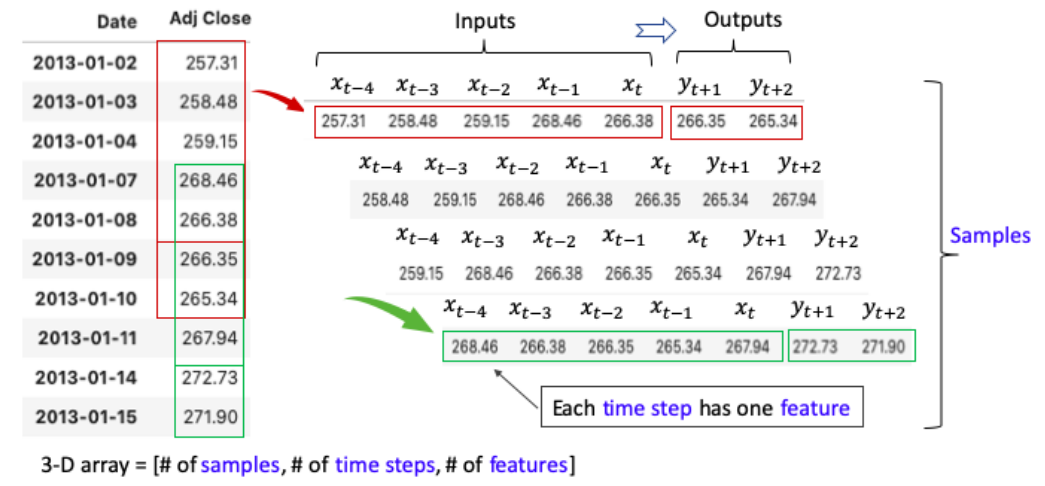

In [ ]:
def make_sequence_dataset(feature,label,window_size):
  feature_list=[]
  label_list=[]

  #주어진 feature와 label의 길이에서 window_size만큼 뺀 범위까지 반복
  for i in range(len(feature)-window_size):
    #feature에서 현재 윈도우 크기에 해당하는 범위를 잘라내어 feature_list에 추가
    feature_list.append(feature[i:i+window_size])
    #label에서 현재 윈도우 크기 다음에 해당하는 위치의 값을 label_list에 추가
    label_list.append(label[i+window_size])

  return np.array(feature_list),np.array(label_list)

# <감성지수 미포함 모델 학습 과정>

## 1) window_size=15
- X,Y 모두 스케일링 진행

In [ ]:
newksp1=newksp.copy()

In [ ]:
newksp2=newksp

In [ ]:
newksp2.shape

(244, 28)

In [ ]:
y=newksp2['Change']
X=newksp2.drop(['Change','result'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaled_data = scaler_x.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

scaler_y = MinMaxScaler()
scaled_data2 = scaler_y.fit_transform(y.values.reshape(-1,1))
scaled_df['Change'] = pd.DataFrame(scaled_data2)

In [ ]:
scaled_df.head()

,Open,High,Low,Close,Volume,UpDown,Comp,Amount,MarCap,Exchange Rate,...,DPO,CCI,-VI,+VI,RSI,SR,WR,PVO,UO,Change
0,0.098687,0.064970,0.090414,0.015494,0.071207,1.0,0.269332,0.015907,0.013904,0.283821,...,0.990920,0.521825,0.000000,0.000000,1.000000,0.087977,0.087977,0.407688,0.000000,0.266428
1,0.056110,0.000000,0.000000,0.000000,0.151100,1.0,0.288209,0.102360,0.000000,0.350769,...,1.000000,0.400721,0.188702,0.018799,0.000000,0.479864,0.479864,0.462121,0.577074,0.286738
2,0.000000,0.065375,0.039353,0.082681,0.154346,0.0,0.511761,0.133200,0.076344,0.416187,...,0.970725,0.624318,0.223735,0.162026,0.851779,0.948608,0.948608,0.505090,0.851268,0.524492
3,0.139648,0.113327,0.156762,0.101900,0.177021,0.0,0.367252,0.227365,0.096697,0.357908,...,0.950457,0.758986,0.221843,0.292760,0.877828,0.833797,0.833797,0.551192,0.802698,0.369176
4,0.106430,0.156558,0.157412,0.158025,0.136549,0.0,0.451292,0.158392,0.146518,0.380492,...,0.925140,0.714484,0.246642,0.336529,0.921318,0.911213,0.911213,0.558897,0.851287,0.457587


In [ ]:
scaled_df.shape

(244, 27)

In [ ]:
y=scaled_df['Change']
X=scaled_df.drop('Change',axis=1)

In [ ]:
feature_np=X.to_numpy()
label_np=y.to_numpy()

print(feature_np.shape,label_np.shape)

(244, 26) (244,)


In [ ]:
window_size=15
X,Y=make_sequence_dataset(feature_np,label_np,window_size)
print(X.shape,Y.shape)

(229, 15, 26) (229,)


In [ ]:
x_train=X[0:224]
y_train=Y[0:224]
x_test=X[224:]
y_test=Y[224:]


print("훈련 데이터 크기:", x_train.shape)
print("테스트 데이터 크기:", x_test.shape)
print("훈련 데이터의 y 크기:", y_train.shape)
print("테스트 데이터의 y 크기:", y_test.shape)

훈련 데이터 크기: (224, 15, 26)
테스트 데이터 크기: (5, 15, 26)
훈련 데이터의 y 크기: (224,)
테스트 데이터의 y 크기: (5,)


In [ ]:
x_train[0].shape

(15, 26)

### **1) 은닉층 1개, 은닉노드 10개** (-0.45049598082112263)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(10, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 2s 102ms/step - loss: 0.0873 - mse: 0.0873 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 9.9641e-04 - val_mse: 9.9641e-04
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 7.3600e-04 - val_mse: 7.3600e-04
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 425ms/step
-0.45049598082112263


### **2) 은닉노드 16개** (-4.374851030091477)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 2s 101ms/step - loss: 0.0435 - mse: 0.0435 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 6/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0151 - mse: 0.0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 423ms/step
-4.374851030091477


### 3)**은닉노드 32일 때** (-7.597613527133927)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(32, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 3s 141ms/step - loss: 0.1320 - mse: 0.1320 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0701 - mse: 0.0701 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 7/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 8/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0176 - mse: 0.0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 1s 611ms/step
-7.597613527133927


### **4) 은닉노드 64** (-0.35817863431592145으로 가장 좋음)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(64, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])


Epoch 1/100
7/7 [==============================] - 4s 100ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 8.4839e-04 - val_mse: 8.4839e-04
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0142 - 

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 423ms/step
-0.35817863431592145


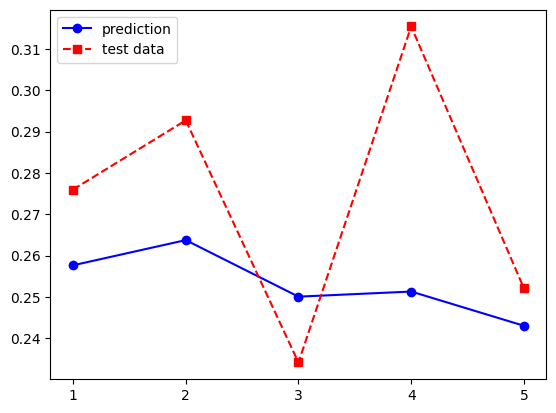

In [ ]:
import matplotlib.pyplot as plt

# 꺾은선 그래프 그리기
plt.plot(pred_lstm, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(y_test, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()

### 종가로 그리기

In [ ]:
rescaled_pred = scaler_y.inverse_transform(np.array(pred_lstm).reshape(-1,1))
rescaled_pred

array([[-0.00553338],
       [-0.00502337],
       [-0.00616786],
       [-0.00606447],
       [-0.00675701]], dtype=float32)

In [ ]:
Last_Close = 2578.08
pred_close = []
for i in range(len(rescaled_pred)):
  Last_Close = Last_Close * (1+rescaled_pred[i])
  pred_close.append(Last_Close)

pred_close

[array([2563.8145], dtype=float32),
 array([2550.9355], dtype=float32),
 array([2535.202], dtype=float32),
 array([2519.8271], dtype=float32),
 array([2502.8005], dtype=float32)]

In [ ]:
test_close = newksp1[-5:]['Close'].to_list()
test_close

[2567.82, 2561.24, 2541.98, 2540.27, 2525.05]

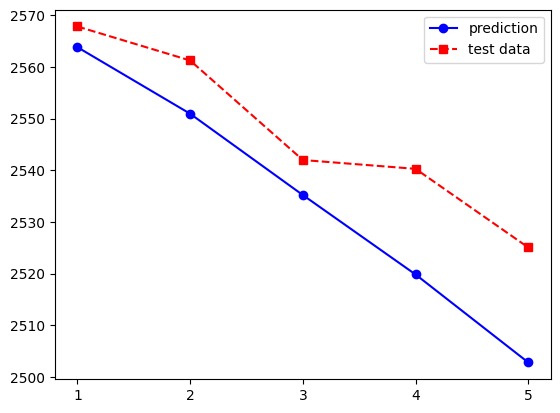

In [ ]:
# 꺾은선 그래프 그리기
plt.plot(pred_close, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(test_close, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()

### **1) 은닉층 2개, 은닉노드 16,8** (-3.3606285030793632)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)

# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(8, input_shape=x_train[0].shape, activation='tanh'))
# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=16,callbacks=[early_stop])

Epoch 1/100
14/14 [==============================] - 4s 84ms/step - loss: 0.0818 - mse: 0.0818 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 2/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 6/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 8/100
14/14 [==============================] - 0s 11ms/step - loss: 0.

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 1s 831ms/step
-3.3606285030793632


### **2) 은닉노드 32,16** (-1.9258104539361582)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)

# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(32, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh'))
# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=16,callbacks=[early_stop])

Epoch 1/100
14/14 [==============================] - 5s 110ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 3/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 5/100
14/14 [==============================] - 0s 19ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 6/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/100
14/14 [==============================] - 0s 19ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 8/100
14/14 [==============================] - 0s 17ms/step - loss: 0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 1s 770ms/step
-1.9258104539361582


### **3) 은닉노드 10,4** (-5.932151434431908)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)

# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(10, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(4, input_shape=x_train[0].shape, activation='tanh'))
# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=16,callbacks=[early_stop])

Epoch 1/100
14/14 [==============================] - 4s 88ms/step - loss: 0.0756 - mse: 0.0756 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 3/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 6/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 7/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 8/100
14/14 [==============================] - 0s 13ms/step - loss: 0.

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))


1/1 [==============================] - 1s 1s/step
-5.932151434431908


## 2) window_size=30

In [ ]:
newksp2=newksp.copy()

In [ ]:
y=newksp2['Change']
X=newksp2.drop(['Change','result'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaled_data = scaler_x.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

scaler_y = MinMaxScaler()
scaled_data2 = scaler_y.fit_transform(y.values.reshape(-1,1))
scaled_df['Change'] = pd.DataFrame(scaled_data2)

In [ ]:
scaled_df.head()

,Open,High,Low,Close,Volume,UpDown,Comp,Amount,MarCap,Exchange Rate,...,DPO,CCI,-VI,+VI,RSI,SR,WR,PVO,UO,Change
0,0.098687,0.064970,0.090414,0.015494,0.071207,1.0,0.269332,0.015907,0.013904,0.283821,...,0.990920,0.521825,0.000000,0.000000,1.000000,0.087977,0.087977,0.407688,0.000000,0.266428
1,0.056110,0.000000,0.000000,0.000000,0.151100,1.0,0.288209,0.102360,0.000000,0.350769,...,1.000000,0.400721,0.188702,0.018799,0.000000,0.479864,0.479864,0.462121,0.577074,0.286738
2,0.000000,0.065375,0.039353,0.082681,0.154346,0.0,0.511761,0.133200,0.076344,0.416187,...,0.970725,0.624318,0.223735,0.162026,0.851779,0.948608,0.948608,0.505090,0.851268,0.524492
3,0.139648,0.113327,0.156762,0.101900,0.177021,0.0,0.367252,0.227365,0.096697,0.357908,...,0.950457,0.758986,0.221843,0.292760,0.877828,0.833797,0.833797,0.551192,0.802698,0.369176
4,0.106430,0.156558,0.157412,0.158025,0.136549,0.0,0.451292,0.158392,0.146518,0.380492,...,0.925140,0.714484,0.246642,0.336529,0.921318,0.911213,0.911213,0.558897,0.851287,0.457587


In [ ]:
scaled_df.shape

(244, 27)

In [ ]:
y=scaled_df['Change']
X=scaled_df.drop('Change',axis=1)

In [ ]:
feature_np=X.to_numpy()
label_np=y.to_numpy()

print(feature_np.shape,label_np.shape)

(244, 26) (244,)


In [ ]:
window_size=30
X,Y=make_sequence_dataset(feature_np,label_np,window_size)
print(X.shape,Y.shape)

(214, 30, 26) (214,)


In [ ]:
x_train=X[0:209]
y_train=Y[0:209]
x_test=X[209:]
y_test=Y[209:]


print("훈련 데이터 크기:", x_train.shape)
print("테스트 데이터 크기:", x_test.shape)
print("훈련 데이터의 y 크기:", y_train.shape)
print("테스트 데이터의 y 크기:", y_test.shape)

훈련 데이터 크기: (209, 30, 26)
테스트 데이터 크기: (5, 30, 26)
훈련 데이터의 y 크기: (209,)
테스트 데이터의 y 크기: (5,)


In [ ]:
x_train[0].shape

(30, 26)

### **1. 은닉노드 10개** (-0.6004318999149441)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(10, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 4s 159ms/step - loss: 0.1030 - mse: 0.1030 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/100
7/7 [==============================] - 0s 27ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0332 - val_mse: 0.0332
Epoch 3/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 7.8828e-04 - val_mse: 7.8828e-04
Epoch 6/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0214 - mse: 0.0214 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 8/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0193 - 

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 419ms/step
-0.6004318999149441


### **2. 은닉노드 16개** (-3.332830429929947)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 3s 102ms/step - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 2/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 6/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 8/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0152 - mse: 0.0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 1s 716ms/step
-3.332830429929947


### **3. 은닉노드 32개** (-6.911782837463763)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(32, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 4s 168ms/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 2/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0680 - mse: 0.0680 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 3/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 5/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 6/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 8/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0174 - mse: 0.0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 413ms/step
-6.911782837463763


### **4. 은닉층 2개 노드 16+8** (-3.279585397694598)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)

# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(8, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 7s 182ms/step - loss: 0.1554 - mse: 0.1554 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 2/100
7/7 [==============================] - 0s 28ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 3/100
7/7 [==============================] - 0s 30ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 5/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/100
7/7 [==============================] - 0s 29ms/step - loss: 0.0147 - mse: 0.0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 1s 820ms/step
-3.279585397694598


### **5. 은닉층 3개 노드 32+16+8** (-0.4359682073249078로 가장 좋음)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)

# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(32, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(8, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 10s 312ms/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 2/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/100
7/7 [==============================] - 0s 41ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/100
7/7 [==============================] - 0s 44ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 6/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 7/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/100
7/7 [==============================] - 0s 41ms/step - loss: 0.0138 - mse: 0.

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 2s 2s/step
-0.4359682073249078


### 은닉층 3개, 노드 32+16+8 예측값으로 그래프 그리기

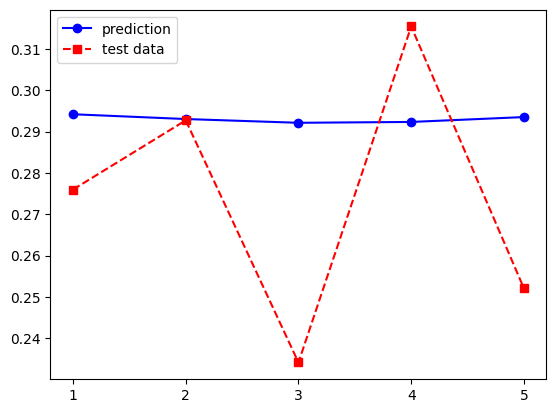

In [ ]:
import matplotlib.pyplot as plt

# 변화율 비교 그래프
plt.plot(pred_lstm, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(y_test, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()


### 종가로 그리기

In [ ]:
newksp1[newksp1.index=='2024-01-05']

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,...,DPO,CCI,-VI,+VI,RSI,SR,WR,PVO,UO,result
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,2586.89,2592.29,2572.6,2578.08,522289892,-0.0035,2,-8.94,8384472928787,2075148802709824,...,-5.498,15.735302,0.760235,0.97373,53.098071,31.968811,-68.031189,5.483398,53.477266,-0.211823


In [ ]:
# 리스케일링
rescaled_pred = scaler_y.inverse_transform(np.array(pred_lstm).reshape(-1,1))
rescaled_pred

array([[-0.00247629],
       [-0.00257317],
       [-0.00264919],
       [-0.00263204],
       [-0.0025334 ]], dtype=float32)

In [ ]:
Last_Close = 2578.08
pred_close = []
for i in range(len(rescaled_pred)):
  Last_Close = Last_Close * (1+rescaled_pred[i])
  pred_close.append(Last_Close)

pred_close

[array([2571.696], dtype=float32),
 array([2565.0786], dtype=float32),
 array([2558.2832], dtype=float32),
 array([2551.5498], dtype=float32),
 array([2545.0857], dtype=float32)]

In [ ]:
test_close = newksp1[-5:]['Close'].to_list()
test_close

[2567.82, 2561.24, 2541.98, 2540.27, 2525.05]

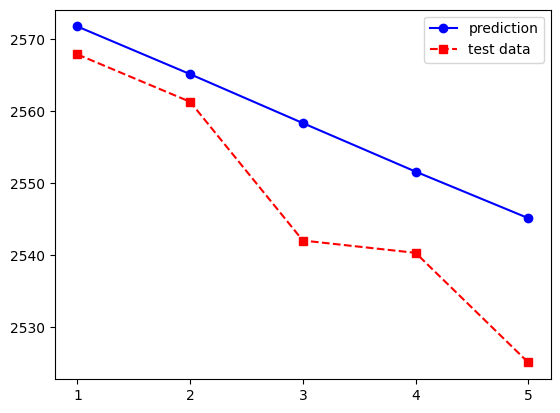

In [ ]:
# 종가 비교 그래프
plt.plot(pred_close, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(test_close, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()

## *window 30일 때 감성분석을 추가한 결과, 성능이 안좋아짐*

In [ ]:
newksp1=newksp.copy()

In [ ]:
y=newksp1['Change']
X=newksp1.drop('Change',axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaled_data = scaler_x.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

scaler_y = MinMaxScaler()
scaled_data2 = scaler_y.fit_transform(y.values.reshape(-1,1))
scaled_df['Change'] = pd.DataFrame(scaled_data2)

In [ ]:
feature_np=X.to_numpy()
label_np=y.to_numpy()

print(feature_np.shape,label_np.shape)

(244, 27) (244,)


In [ ]:
window_size=30
X,Y=make_sequence_dataset(feature_np,label_np,window_size)
print(X.shape,Y.shape)

(214, 30, 27) (214,)


In [ ]:
x_train=X[0:209]
y_train=Y[0:209]
x_test=X[209:]
y_test=Y[209:]


print("훈련 데이터 크기:", x_train.shape)
print("테스트 데이터 크기:", x_test.shape)
print("훈련 데이터의 y 크기:", y_train.shape)
print("테스트 데이터의 y 크기:", y_test.shape)

훈련 데이터 크기: (209, 30, 27)
테스트 데이터 크기: (5, 30, 27)
훈련 데이터의 y 크기: (209,)
테스트 데이터의 y 크기: (5,)


### 5-2. 앞서 가장 좋았던 모델; 은닉층 3개, 노드 32+16+8  (-7.5113493598060135)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)

# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(32, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(8, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

2024-01-18 16:09:47.390346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 16:09:51.438784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:09:51.442084: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/spl

Epoch 1/100


2024-01-18 16:09:51.931932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:09:51.933734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:09:51.935328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/7 [========================>.....] - ETA: 0s - loss: 0.0037 - mse: 0.0037

2024-01-18 16:09:56.923980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:09:56.925141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:09:56.927123: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 6s 181ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 6.7994e-06 - val_mse: 6.7994e-06
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 9.0267e-04 - mse: 9.0267e-04 - val_loss: 1.1734e-04 - val_mse: 1.1734e-04
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 4.4473e-04 - mse: 4.4473e-04 - val_loss: 2.9768e-05 - val_mse: 2.9768e-05
Epoch 4/100
7/7 [==============================] - 0s 23ms/step - loss: 2.3605e-04 - mse: 2.3605e-04 - val_loss: 1.9063e-04 - val_mse: 1.9063e-04
Epoch 5/100
7/7 [==============================] - 0s 22ms/step - loss: 1.4595e-04 - mse: 1.4595e-04 - val_loss: 1.8467e-05 - val_mse: 1.8467e-05
Epoch 6/100
7/7 [==============================] - 0s 23ms/step - loss: 1.1942e-04 - mse: 1.1942e-04 - val_loss: 1.1960e-04 - val_mse: 1.1960e-04
Epoch 7/100
7/7 [==============================] - 0s 26ms/step - loss: 1.1069e-04 - mse: 1.1069e-04 - val_loss: 5.8746e-06 - val_mse: 5.8746e-

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

2024-01-18 16:10:23.770560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:10:23.772169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:10:23.773560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 809ms/step
-7.5113493598060135


### 은닉층 1 - 10 (-12 가장 안좋음)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(10, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100


2024-01-18 16:16:08.123821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:16:08.125836: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:16:08.127527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 2s 94ms/step - loss: 1.2435 - mse: 1.2435 - val_loss: 1.2131 - val_mse: 1.2131
Epoch 2/100


2024-01-18 16:16:10.474305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:16:10.477649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:16:10.479277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 0s 10ms/step - loss: 1.1776 - mse: 1.1776 - val_loss: 1.1482 - val_mse: 1.1482
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 1.1138 - mse: 1.1138 - val_loss: 1.0855 - val_mse: 1.0855
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 1.0523 - mse: 1.0523 - val_loss: 1.0251 - val_mse: 1.0251
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.9931 - mse: 0.9931 - val_loss: 0.9671 - val_mse: 0.9671
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.9363 - mse: 0.9363 - val_loss: 0.9114 - val_mse: 0.9114
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.8819 - mse: 0.8819 - val_loss: 0.8582 - val_mse: 0.8582
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 0.8299 - mse: 0.8299 - val_loss: 0.8074 - val_mse: 0.8074
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7802 - mse: 0.7802 - val_los

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 308ms/step
-12.547819242852503


2024-01-18 16:16:37.948799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:16:37.951009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:16:37.953305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### 은닉층 1-16 (-3.47)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100


2024-01-18 16:17:04.327064: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:17:04.329603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:17:04.331222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 2s 71ms/step - loss: 0.2260 - mse: 0.2260 - val_loss: 0.2083 - val_mse: 0.2083
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.2052 - mse: 0.2052

2024-01-18 16:17:06.337661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:17:06.338698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:17:06.340257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 0s 11ms/step - loss: 0.1909 - mse: 0.1909 - val_loss: 0.1749 - val_mse: 0.1749
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.1593 - mse: 0.1593 - val_loss: 0.1451 - val_mse: 0.1451
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1313 - mse: 0.1313 - val_loss: 0.1189 - val_mse: 0.1189
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 0.1068 - mse: 0.1068 - val_loss: 0.0962 - val_mse: 0.0962
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0858 - mse: 0.0858 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0681 - mse: 0.0681 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0412 - mse: 0.0412 - val_los

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 309ms/step
-3.4762157251867096


2024-01-18 16:17:32.713856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:17:32.715980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:17:32.718166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### 은닉층 1 - 32 (-3.48)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(32, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100


2024-01-18 16:17:54.286610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:17:54.288585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:17:54.290650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 2s 64ms/step - loss: 0.4994 - mse: 0.4994 - val_loss: 0.4524 - val_mse: 0.4524
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 0.4479 - mse: 0.4479

2024-01-18 16:17:56.341952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:17:56.344289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:17:56.346164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 0s 11ms/step - loss: 0.4140 - mse: 0.4140 - val_loss: 0.3720 - val_mse: 0.3720
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3379 - mse: 0.3379 - val_loss: 0.3011 - val_mse: 0.3011
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2715 - mse: 0.2715 - val_loss: 0.2399 - val_mse: 0.2399
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2146 - mse: 0.2146 - val_loss: 0.1882 - val_mse: 0.1882
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1669 - mse: 0.1669 - val_loss: 0.1452 - val_mse: 0.1452
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1276 - mse: 0.1276 - val_loss: 0.1102 - val_mse: 0.1102
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0958 - mse: 0.0958 - val_loss: 0.0822 - val_mse: 0.0822
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0707 - mse: 0.0707 - val_los

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 312ms/step
-3.485362749389644


2024-01-18 16:18:22.650332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:18:22.652380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:18:22.654225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### 은닉층 2 -16, 8 (-3.77)

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import GlorotNormal #Xiaver초기화
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)

# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(16, input_shape=x_train[0].shape, activation='tanh',return_sequences=True))
model.add(LSTM(8, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

2024-01-18 16:18:50.822219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:18:50.824240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:18:50.826374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2024-01-18 16:18:51.033308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:18:51.035283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:18:51.037186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/7 [====================>.........] - ETA: 0s - loss: 0.1285 - mse: 0.1285 

2024-01-18 16:18:55.155634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:18:55.159403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:18:55.161238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 4s 136ms/step - loss: 0.1161 - mse: 0.1161 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 3/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 2.2032e-05 - val_mse: 2.2032e-05
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 8.3779e-04 - mse: 8.3779e-04 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 5/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 6/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 4.7525e-04 - mse: 4.7525e-04 - val_loss: 8.2100e-05 - val_mse: 8.2100e-05
Epoch 8/100
7/7 [==============================] - 0s 17ms/step - los

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

2024-01-18 16:19:10.141634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:19:10.143965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:19:10.146454: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 580ms/step
-3.776911578022786


2024-01-18 16:19:10.354042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-18 16:19:10.356147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-18 16:19:10.358531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

## => window 크기가 15일 때가 30일 때보다 단기예측에 더 적합하다고 판단
### window_size=15일 때 성능이 좋았던 모델에 감성지수를 추가하여 결과를 비교해보자

# <감성지수 포함 모델 학습 과정>
## 감성지수 추가 (window_size=15)

In [ ]:
newksp1=newksp.copy()

In [ ]:
newksp1.shape

(244, 28)

In [ ]:
y=newksp1['Change']
X=newksp1.drop('Change',axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaled_data = scaler_x.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

scaler_y = MinMaxScaler()
scaled_data2 = scaler_y.fit_transform(y.values.reshape(-1,1))
scaled_df['Change'] = pd.DataFrame(scaled_data2)

In [ ]:
scaled_df.head()

,Open,High,Low,Close,Volume,UpDown,Comp,Amount,MarCap,Exchange Rate,...,CCI,-VI,+VI,RSI,SR,WR,PVO,UO,result,Change
0,0.098687,0.064970,0.090414,0.015494,0.071207,1.0,0.269332,0.015907,0.013904,0.283821,...,0.521825,0.000000,0.000000,1.000000,0.087977,0.087977,0.407688,0.000000,0.511230,0.266428
1,0.056110,0.000000,0.000000,0.000000,0.151100,1.0,0.288209,0.102360,0.000000,0.350769,...,0.400721,0.188702,0.018799,0.000000,0.479864,0.479864,0.462121,0.577074,0.281172,0.286738
2,0.000000,0.065375,0.039353,0.082681,0.154346,0.0,0.511761,0.133200,0.076344,0.416187,...,0.624318,0.223735,0.162026,0.851779,0.948608,0.948608,0.505090,0.851268,0.171427,0.524492
3,0.139648,0.113327,0.156762,0.101900,0.177021,0.0,0.367252,0.227365,0.096697,0.357908,...,0.758986,0.221843,0.292760,0.877828,0.833797,0.833797,0.551192,0.802698,0.709590,0.369176
4,0.106430,0.156558,0.157412,0.158025,0.136549,0.0,0.451292,0.158392,0.146518,0.380492,...,0.714484,0.246642,0.336529,0.921318,0.911213,0.911213,0.558897,0.851287,0.512360,0.457587


In [ ]:
scaled_df.shape

(244, 28)

In [ ]:
y=scaled_df['Change']
X=scaled_df.drop('Change',axis=1)

In [ ]:
feature_np=X.to_numpy()
label_np=y.to_numpy()

print(feature_np.shape,label_np.shape)

(244, 27) (244,)


In [ ]:
window_size=15
X,Y=make_sequence_dataset(feature_np,label_np,window_size)
print(X.shape,Y.shape)

(229, 15, 27) (229,)


In [ ]:
x_train=X[0:224]
y_train=Y[0:224]
x_test=X[224:]
y_test=Y[224:]


print("훈련 데이터 크기:", x_train.shape)
print("테스트 데이터 크기:", x_test.shape)
print("훈련 데이터의 y 크기:", y_train.shape)
print("테스트 데이터의 y 크기:", y_test.shape)

훈련 데이터 크기: (224, 15, 27)
테스트 데이터 크기: (5, 15, 27)
훈련 데이터의 y 크기: (224,)
테스트 데이터의 y 크기: (5,)


In [ ]:
x_train[0].shape

(15, 27)

### 1) 은닉노드 10개 (-0.45049598082112263)
-> 감성 지수 추가후 **-0.37889156485014075**

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(10, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 5s 98ms/step - loss: 0.0714 - mse: 0.0714 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 8.4588e-04 - val_mse: 8.4588e-04
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 8.4726e-04 - val_mse: 8.4726e-04
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 9.5976e-04 - val_mse: 9.5976e-04
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - 

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 23ms/step
-0.37889156485014075


In [ ]:
pred_lstm

array([[0.31199875],
       [0.32276967],
       [0.2568776 ],
       [0.26661253],
       [0.22749527]], dtype=float32)

In [ ]:
y_test

array([0.27598566, 0.29271207, 0.23416965, 0.31541219, 0.2520908 ])

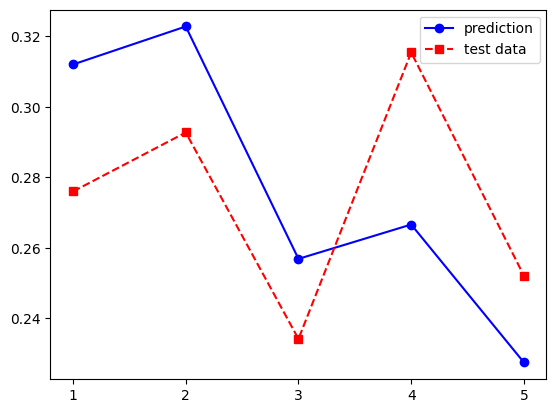

In [ ]:
import matplotlib.pyplot as plt

# 꺾은선 그래프 그리기
plt.plot(pred_lstm, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(y_test, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()


### 종가로 그리기

In [ ]:
newksp1[newksp1.index=='2024-01-05']

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,...,DPO,CCI,-VI,+VI,RSI,SR,WR,PVO,UO,result
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,2586.89,2592.29,2572.6,2578.08,522289892,-0.0035,2,-8.94,8384472928787,2075148802709824,...,-5.498,15.735302,0.760235,0.97373,53.098071,31.968811,-68.031189,5.483398,53.477266,-0.211823


In [ ]:
rescaled_pred = scaler_y.inverse_transform(np.array(pred_lstm).reshape(-1,1))
rescaled_pred

array([[-9.8570425e-04],
       [-8.4178479e-05],
       [-5.5993446e-03],
       [-4.7845314e-03],
       [-8.0586458e-03]], dtype=float32)

In [ ]:
Last_Close = 2578.08
pred_close = []
for i in range(len(rescaled_pred)):
  Last_Close = Last_Close * (1+rescaled_pred[i])
  pred_close.append(Last_Close)

pred_close

[array([2575.5388], dtype=float32),
 array([2575.322], dtype=float32),
 array([2560.9019], dtype=float32),
 array([2548.6492], dtype=float32),
 array([2528.1104], dtype=float32)]

In [ ]:
test_close = newksp1[-5:]['Close'].to_list()
test_close

[2567.82, 2561.24, 2541.98, 2540.27, 2525.05]

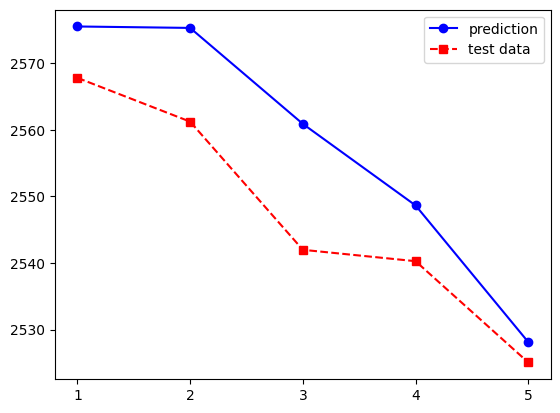

In [ ]:
# 꺾은선 그래프 그리기
plt.plot(pred_close, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(test_close, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()

### 2) 은닉노드 64 (-0.35817863431592145)

감성지수 추가후 **-0.276311397163139**

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(64, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 3s 129ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 4/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0147 - mse: 0.0147 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 7/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 8/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0142 - mse: 0.0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 27ms/step
-0.276311397163139


In [ ]:
pred_lstm

array([[0.25666144],
       [0.2707238 ],
       [0.2610686 ],
       [0.25460413],
       [0.25177965]], dtype=float32)

In [ ]:
y_test

array([0.27598566, 0.29271207, 0.23416965, 0.31541219, 0.2520908 ])

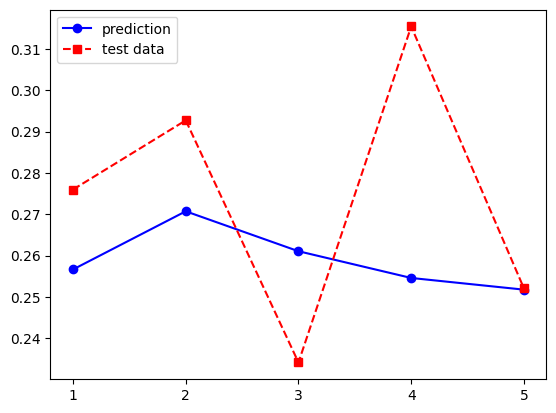

In [ ]:
import matplotlib.pyplot as plt

# 꺾은선 그래프 그리기
plt.plot(pred_lstm, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(y_test, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()


### 종가로 그리기

In [ ]:
newksp1[newksp1.index=='2024-01-05']

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,...,DPO,CCI,-VI,+VI,RSI,SR,WR,PVO,UO,result
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,2586.89,2592.29,2572.6,2578.08,522289892,-0.0035,2,-8.94,8384472928787,2075148802709824,...,-5.498,15.735302,0.760235,0.97373,53.098071,31.968811,-68.031189,5.483398,53.477266,-0.211823


In [ ]:
rescaled_pred = scaler_y.inverse_transform(np.array(pred_lstm).reshape(-1,1))
rescaled_pred

array([[-0.00561744],
       [-0.00444042],
       [-0.00524856],
       [-0.00578963],
       [-0.00602604]], dtype=float32)

In [ ]:
Last_Close = 2578.08
pred_close = []
for i in range(len(rescaled_pred)):
  Last_Close = Last_Close * (1+rescaled_pred[i])
  pred_close.append(Last_Close)

pred_close

[array([2563.598], dtype=float32),
 array([2552.2144], dtype=float32),
 array([2538.8188], dtype=float32),
 array([2524.12], dtype=float32),
 array([2508.9097], dtype=float32)]

In [ ]:
test_close = newksp1[-5:]['Close'].to_list()
test_close

[2567.82, 2561.24, 2541.98, 2540.27, 2525.05]

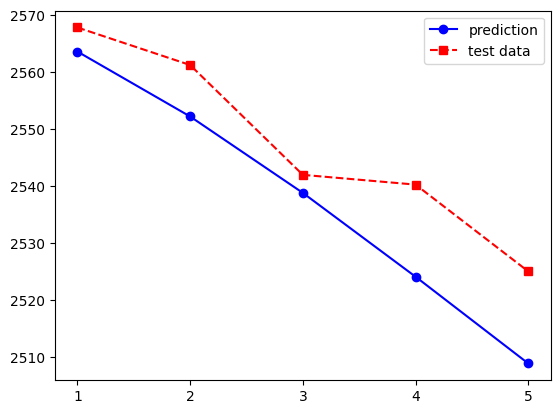

In [ ]:
# 꺾은선 그래프 그리기
plt.plot(pred_close, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(test_close, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()

### 3) 은닉노드 32일 때 (-7.597613527133927)

감성지수 추가후 **-0.038164998862941335**

In [ ]:
import tensorflow as tf
import random as rn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Python의 랜덤 모듈에 대한 시드 설정
np.random.seed(2)
rn.seed(2)

# TensorFlow의 랜덤 모듈에 대한 시드 설정
tf.random.set_seed(2)


# 모델 생성
model = Sequential()

# 첫 번째 LSTM 층 (은닉층 1)
model.add(LSTM(32, input_shape=x_train[0].shape, activation='tanh'))

# 출력층
model.add(Dense(units=1,activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

# 모델 학습
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
7/7 [==============================] - 2s 103ms/step - loss: 0.1185 - mse: 0.1185 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0173 - mse: 0.0

In [ ]:
from sklearn.metrics import r2_score
pred_lstm=model.predict(x_test)
print(r2_score(y_test,pred_lstm))

1/1 [==============================] - 0s 424ms/step
-0.038164998862941335


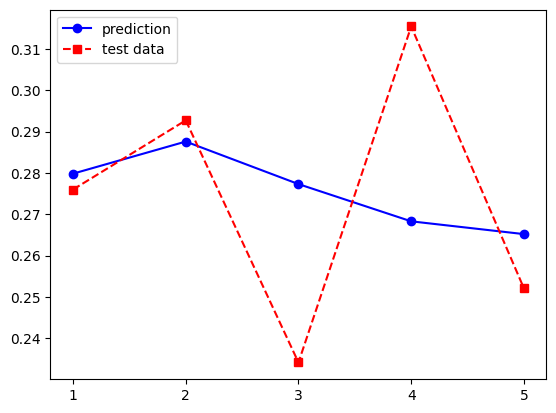

In [ ]:
import matplotlib.pyplot as plt

# 꺾은선 그래프 그리기
plt.plot(pred_lstm, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(y_test, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()

### 종가로 그리기

In [ ]:
rescaled_pred = scaler_y.inverse_transform(np.array(pred_lstm).reshape(-1,1))
rescaled_pred

array([[-0.00367856],
       [-0.00302911],
       [-0.00388975],
       [-0.00464346],
       [-0.00490207]], dtype=float32)

In [ ]:
Last_Close = 2578.08
pred_close = []
for i in range(len(rescaled_pred)):
  Last_Close = Last_Close * (1+rescaled_pred[i])
  pred_close.append(Last_Close)

pred_close

[array([2568.5964], dtype=float32),
 array([2560.816], dtype=float32),
 array([2550.855], dtype=float32),
 array([2539.0103], dtype=float32),
 array([2526.564], dtype=float32)]

In [ ]:
test_close = newksp1[-5:]['Close'].to_list()
test_close

[2567.82, 2561.24, 2541.98, 2540.27, 2525.05]

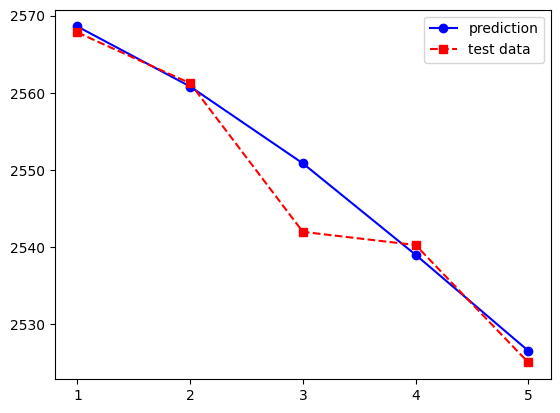

In [ ]:
# 꺾은선 그래프 그리기
plt.plot(pred_close, marker='o', linestyle='-', color='b', label='prediction')
plt.plot(test_close, marker='s', linestyle='--', color='r', label='test data')

custom_ticks = [0, 1, 2, 3, 4]
custom_labels = ['1', '2', '3', '4', '5']

plt.xticks(custom_ticks, custom_labels)

plt.legend()
plt.show()

- 세 모델 모두 감성지수를 포함한 데이터로 학습했을 때 성능이 좋아짐